# Description
This file contains a 15 month model of the financial situation of the CrowdLoan company. The model is based on the company's income, expenses, credits and loans. The model is used to calculate the company's financial situation in the future and to make decisions based on that information.

In [191]:
# Author: Santiago Morales
# Last Modified: 12/10/2020
from model import *
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

We set the initial values:

In [192]:
# Three initial loans of COP 30e9, the first due in one month, the second due in two months and the third due in three months. All have 25% annual interest.
time = 0
amount = 30e9
interest = 0.25
initial_loans = []
for i in range(3):
    initial_loans.append(Loan(time, i + 1, interest, amount, "COP"))
    
# New credits: for each one of the following 12 months, CrowdLoan will give a credit of COP 30e9 with 25% annual interest and a duration of 3 months.
duration = 3
amount = 30e9
interest = 0.25
initial_credits = []
for i in range(12):
    initial_credits.append(Credit(i + 1, duration, interest, amount))  

# Inital Fixed Expenses: COP 400e6 per month, USD 70e3 per month and EUR 30e3 per month
initial_fixed_expenses = [(400e6, "COP"), (70e3, "USD"), (30e3, "EUR")]

# Initial debts: CrowdLoan has a debt of USD 3e6 and EUR 2e6. The debt must be paid uniformly over 12 months. The annual interest is 10%.
USD_amount = 3e6
EUR_amount = 2e6
interest = 0.1
USD_individual_debt = USD_amount / 12
EUR_individual_debt = EUR_amount / 12
for i in range(12):
    initial_loans.append(Loan(time, i + 1, interest, USD_individual_debt, "USD"))
    initial_loans.append(Loan(time, i + 1, interest, EUR_individual_debt, "EUR"))


# Initial loans: Crowdloan will take a loan every month for the next three months. The loans will be of USD 200e3 and EUR 250e3. The annual interest is 10% and the duration is one year.
USD_amount = 200e3
EUR_amount = 250e3
interest = 0.1
duration = 12
for i in range(3):
    initial_loans.append(Loan(i + 1, duration, interest, USD_amount, "USD"))
    initial_loans.append(Loan(i + 1, duration, interest, EUR_amount, "EUR"))

# Exchange rates: COP 4600 per USD and COP 4500 per EUR
USD_exchange_rate = 4600
EUR_exchange_rate = 4500

# Initial balance: COP 90e9 + USD 3e6 + EUR 2e6
initial_balance = 90e9 + 3e6 * USD_exchange_rate + 2e6 * EUR_exchange_rate

In [193]:
# Flow
CrowdLoan = Model(initial_fixed_expenses, initial_credits, initial_loans, initial_balance)

# Simulate 15 months of the model, and save the results in a dataframe at each time step.
# The dataframe will have the following columns: COP flow, USD flow, EUR flow, total flow

# Create the dataframe
df = pd.DataFrame(columns=["COP flow", "USD flow", "EUR flow", "Total flow"])

# Simulate 15 months
for i in range(15):
    CrowdLoan.simulate_month(USD_exchange_rate, EUR_exchange_rate)
    # Add results to the dataframe columns
    df.loc[i] = [CrowdLoan.get_COP_flow(), CrowdLoan.get_USD_flow(), CrowdLoan.get_EUR_flow(), CrowdLoan.get_total_flow()]
df.index += 1

pd.options.display.float_format = '${:,.2f}'.format
df

,COP flow,USD flow,EUR flow,Total flow
1,"$-61,025,000,000.00","$-122,083.33","$51,944.44","$-61,347,833,333.33"
2,"$-61,650,000,000.00","$-124,166.67","$50,555.56","$-61,988,666,666.67"
3,"$-62,275,000,000.00","$-126,250.00","$49,166.67","$-62,629,500,000.00"
4,"$1,475,000,000.00","$-328,333.33","$-202,222.22","$-945,333,333.33"
5,"$1,475,000,000.00","$-330,416.67","$-203,611.11","$-961,166,666.67"
6,"$1,475,000,000.00","$-332,500.00","$-205,000.00","$-977,000,000.00"
7,"$1,475,000,000.00","$-334,583.33","$-206,388.89","$-992,833,333.33"
8,"$1,475,000,000.00","$-336,666.67","$-207,777.78","$-1,008,666,666.67"
9,"$1,475,000,000.00","$-338,750.00","$-209,166.67","$-1,024,500,000.00"
10,"$1,475,000,000.00","$-340,833.33","$-210,555.56","$-1,040,333,333.33"


In [194]:


CrowdLoan = Model(initial_fixed_expenses, initial_credits, initial_loans, initial_balance, bank_account_duration=1)
# Simulate 15 months of the model, and save the results in a dataframe at each time step.
# The dataframe will have the following columns: time, COP income, USD income, EUR income, total income, COP expenses, USD expenses, EUR expenses, total expenses, COP flow, USD flow, EUR flow, total flow,, Bank balance

# Create the dataframe
df = pd.DataFrame(columns=["Time", "COP income", "USD income", "EUR income", "Total income", "COP expenses", "USD expenses", "EUR expenses", "Total expenses", "COP flow", "USD flow", "EUR flow", "Total flow", "Bank balance"])

print('Initial bank account balance: ${:,.2f}'.format(CrowdLoan.bank_account.balance))
# Simulate 15 months
for i in range(15):
    CrowdLoan.simulate_month(USD_exchange_rate, EUR_exchange_rate)
    # Add results to the dataframe columns
    df.loc[i] = [i + 1, CrowdLoan.COP_income, CrowdLoan.USD_income, CrowdLoan.EUR_income, CrowdLoan.income, CrowdLoan.COP_expenses, CrowdLoan.USD_expenses, CrowdLoan.EUR_expenses, CrowdLoan.expenses, CrowdLoan.get_COP_flow(), CrowdLoan.get_USD_flow(), CrowdLoan.get_EUR_flow(), CrowdLoan.get_total_flow(), CrowdLoan.bank_account.balance]
df.index += 1
    

pd.options.display.float_format = '${:,.2f}'.format
print('Final bank account balance: ${:,.2f}'.format(CrowdLoan.bank_account.balance))
df

Initial bank account balance: $112,800,000,000.00
Final bank account balance: $-5,968,917,671.16


,Time,COP income,USD income,EUR income,Total income,COP expenses,USD expenses,EUR expenses,Total expenses,COP flow,USD flow,EUR flow,Total flow,Bank balance
1,$1.00,"$940,000,000.00","$200,000.00","$250,000.00","$2,990,000,000.00","$61,025,000,000.00","$322,083.33","$198,055.56","$63,397,833,333.33","$-60,085,000,000.00","$-122,083.33","$51,944.44","$-60,407,833,333.33","$52,392,166,666.67"
2,$2.00,"$436,601,388.89","$200,000.00","$250,000.00","$2,486,601,388.89","$61,650,000,000.00","$324,166.67","$199,444.44","$64,038,666,666.67","$-61,213,398,611.11","$-124,166.67","$50,555.56","$-61,552,065,277.78","$-9,159,898,611.11"
3,$3.00,$0.00,"$200,000.00","$250,000.00","$2,050,000,000.00","$62,389,498,732.64","$326,250.00","$200,833.33","$64,793,998,732.64","$-62,389,498,732.64","$-126,250.00","$49,166.67","$-62,743,998,732.64","$-71,903,897,343.75"
4,$4.00,"$31,875,000,000.00",$0.00,$0.00,"$31,875,000,000.00","$31,298,798,716.80","$328,333.33","$202,222.22","$33,719,132,050.13","$576,201,283.20","$-328,333.33","$-202,222.22","$-1,844,132,050.13","$-73,748,029,393.88"
5,$5.00,"$31,875,000,000.00",$0.00,$0.00,"$31,875,000,000.00","$31,321,850,367.42","$330,416.67","$203,611.11","$33,758,017,034.09","$553,149,632.58","$-330,416.67","$-203,611.11","$-1,883,017,034.09","$-75,631,046,427.97"
6,$6.00,"$31,875,000,000.00",$0.00,$0.00,"$31,875,000,000.00","$31,345,388,080.35","$332,500.00","$205,000.00","$33,797,388,080.35","$529,611,919.65","$-332,500.00","$-205,000.00","$-1,922,388,080.35","$-77,553,434,508.32"
7,$7.00,"$31,875,000,000.00",$0.00,$0.00,"$31,875,000,000.00","$31,369,417,931.35","$334,583.33","$206,388.89","$33,837,251,264.69","$505,582,068.65","$-334,583.33","$-206,388.89","$-1,962,251,264.69","$-79,515,685,773.01"
8,$8.00,"$31,875,000,000.00",$0.00,$0.00,"$31,875,000,000.00","$31,393,946,072.16","$336,666.67","$207,777.78","$33,877,612,738.83","$481,053,927.84","$-336,666.67","$-207,777.78","$-2,002,612,738.83","$-81,518,298,511.84"
9,$9.00,"$31,875,000,000.00",$0.00,$0.00,"$31,875,000,000.00","$31,418,978,731.40","$338,750.00","$209,166.67","$33,918,478,731.40","$456,021,268.60","$-338,750.00","$-209,166.67","$-2,043,478,731.40","$-83,561,777,243.23"
10,$10.00,"$31,875,000,000.00",$0.00,$0.00,"$31,875,000,000.00","$31,444,522,215.54","$340,833.33","$210,555.56","$33,959,855,548.87","$430,477,784.46","$-340,833.33","$-210,555.56","$-2,084,855,548.87","$-85,646,632,792.11"


In [195]:
print("${:,.2f}".format(df["Total flow"].sum()+ initial_balance))

$-5,968,917,671.16


In [196]:
# Simulate USD_exchange_rate and EUR_exchange_rate for 15 months
# Create the dataframe
exchange_rate_df = pd.DataFrame(columns=["USD exchange rate", "EUR exchange rate"])

# Simulate 15 months with random fluctuations of COP 500 
for i in range(15):
    USD_exchange_rate = 4600
    EUR_exchange_rate = 4500
    USD_exchange_rate += random.randint(-500, 500)
    EUR_exchange_rate += random.randint(-500, 500)
    exchange_rate_df.loc[i] = [USD_exchange_rate, EUR_exchange_rate]

CrowdLoan = Model(initial_fixed_expenses, initial_credits, initial_loans, initial_balance, bank_account_duration=1)
# Create the dataframe
df = pd.DataFrame(columns=["COP income", "USD income", "EUR income", "Total income", "COP expenses", "USD expenses", "EUR expenses", "Total expenses", "COP flow", "USD flow", "EUR flow", "Total flow", "Bank balance"])

# Simulate 15 months using the exchange rates from the exchange rate dataframe
for i in range(15):
    CrowdLoan.simulate_month(exchange_rate_df["USD exchange rate"][i], exchange_rate_df["EUR exchange rate"][i])
    # Add results to the dataframe columns
    df.loc[i] = [CrowdLoan.COP_income, CrowdLoan.USD_income, CrowdLoan.EUR_income, CrowdLoan.income, CrowdLoan.COP_expenses, CrowdLoan.USD_expenses, CrowdLoan.EUR_expenses, CrowdLoan.expenses, CrowdLoan.get_COP_flow(), CrowdLoan.get_USD_flow(), CrowdLoan.get_EUR_flow(), CrowdLoan.get_total_flow(), CrowdLoan.bank_account.balance]

pd.options.display.float_format = '${:,.2f}'.format
df  

,COP income,USD income,EUR income,Total income,COP expenses,USD expenses,EUR expenses,Total expenses,COP flow,USD flow,EUR flow,Total flow,Bank balance
0,"$940,000,000.00","$200,000.00","$250,000.00","$2,964,600,000.00","$61,025,000,000.00","$322,083.33","$198,055.56","$63,350,624,166.67","$-60,085,000,000.00","$-122,083.33","$51,944.44","$-60,386,024,166.67","$52,413,975,833.33"
1,"$436,783,131.94","$200,000.00","$250,000.00","$2,479,183,131.94","$61,650,000,000.00","$324,166.67","$199,444.44","$64,053,246,666.67","$-61,213,216,868.06","$-124,166.67","$50,555.56","$-61,574,063,534.72","$-9,160,087,701.39"
2,$0.00,"$200,000.00","$250,000.00","$2,081,100,000.00","$62,389,501,096.27","$326,250.00","$200,833.33","$64,816,957,762.93","$-62,389,501,096.27","$-126,250.00","$49,166.67","$-62,735,857,762.93","$-71,895,945,464.32"
3,"$31,875,000,000.00",$0.00,$0.00,"$31,875,000,000.00","$31,298,699,318.30","$328,333.33","$202,222.22","$33,611,025,429.42","$576,300,681.70","$-328,333.33","$-202,222.22","$-1,736,025,429.42","$-73,631,970,893.74"
4,"$31,875,000,000.00",$0.00,$0.00,"$31,875,000,000.00","$31,320,399,636.17","$330,416.67","$203,611.11","$33,764,730,747.28","$554,600,363.83","$-330,416.67","$-203,611.11","$-1,889,730,747.28","$-75,521,701,641.02"
5,"$31,875,000,000.00",$0.00,$0.00,"$31,875,000,000.00","$31,344,021,270.51","$332,500.00","$205,000.00","$33,956,648,770.51","$530,978,729.49","$-332,500.00","$-205,000.00","$-2,081,648,770.51","$-77,603,350,411.53"
6,"$31,875,000,000.00",$0.00,$0.00,"$31,875,000,000.00","$31,370,041,880.14","$334,583.33","$206,388.89","$33,856,884,380.14","$504,958,119.86","$-334,583.33","$-206,388.89","$-1,981,884,380.14","$-79,585,234,791.68"
7,"$31,875,000,000.00",$0.00,$0.00,"$31,875,000,000.00","$31,394,815,434.90","$336,666.67","$207,777.78","$33,667,349,879.34","$480,184,565.10","$-336,666.67","$-207,777.78","$-1,792,349,879.34","$-81,377,584,671.02"
8,"$31,875,000,000.00",$0.00,$0.00,"$31,875,000,000.00","$31,417,219,808.39","$338,750.00","$209,166.67","$34,013,948,558.39","$457,780,191.61","$-338,750.00","$-209,166.67","$-2,138,948,558.39","$-83,516,533,229.41"
9,"$31,875,000,000.00",$0.00,$0.00,"$31,875,000,000.00","$31,443,956,665.37","$340,833.33","$210,555.56","$33,971,996,387.59","$431,043,334.63","$-340,833.33","$-210,555.56","$-2,096,996,387.59","$-85,613,529,617.00"


In [197]:
print("${:,.2f}".format(df["Total flow"].sum() + initial_balance))

$-5,906,900,768.57


In [198]:
exchange_rate_df

,USD exchange rate,EUR exchange rate
0,4304,4743
1,4896,4092
2,4490,4793
3,4401,4289
4,4894,4063
5,4953,4711
6,4444,4845
7,4150,4213
8,5063,4215
9,4405,4876


In [199]:
# Function which given initital fixed expenses, initial credits, initial loans and exchange rate dataframe, returns the sum of the net flow of evey month of the model
def get_total_flow(initial_fixed_expenses, initial_credits, initial_loans, initial_balance, exchange_rate_df, bank_account_duration=1):
    CrowdLoan = Model(initial_fixed_expenses, initial_credits, initial_loans, initial_balance, bank_account_duration=bank_account_duration)
    total_flow = 0
    for i in range(15):
        CrowdLoan.simulate_month(exchange_rate_df["USD exchange rate"][i], exchange_rate_df["EUR exchange rate"][i])
        total_flow += CrowdLoan.get_total_flow()
    return total_flow

total_flow = get_total_flow(initial_fixed_expenses, initial_credits, initial_loans, initial_balance, exchange_rate_df)
# Format total_flow to two decimal places
print("${:,.2f}".format(total_flow))

$-118,706,900,768.57


In [200]:
print("${:,.2f}".format(initial_balance + total_flow))

$-5,906,900,768.57


# Risk Factors

Retrieve the data from the Alpha Vantage API and save it in a csv

In [201]:
# # UserLook for 5 years of en-of-month exchange rates of USD and EUR from october 2017 to october 2022 from Alpha Vantage API
# import pandas as pd
# from alpha_vantage.foreignexchange import ForeignExchange
# import matplotlib.pyplot as plt

# api_key = 'L10ZYH1U3ZK86C0C'
# fx = ForeignExchange(key=api_key, output_format='pandas')

# # Get the data, and save it in a dataframe
# data, meta_data = fx.get_currency_exchange_monthly(from_symbol='USD', to_symbol='COP')
# data = data.rename(columns={"4. close": "USD_exchange_rate"})
# data["EUR_exchange_rate"] = fx.get_currency_exchange_monthly(from_symbol='EUR', to_symbol='COP')[0]["4. close"]
# data = data.rename(columns={"4.close": "EUR_exchange_rate"})
# data = data[["USD_exchange_rate", "EUR_exchange_rate"]]
# data = data.sort_index().loc["2017-10-01":"2022-10-31"]

# # Plot the data
# data.plot()
# data.to_csv("exchange_rates.csv")


Read the data

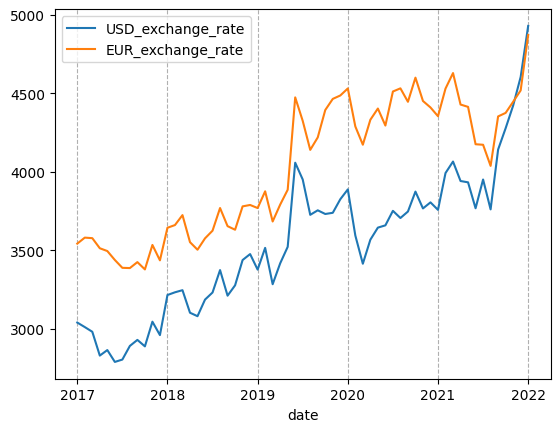

In [202]:
# Read the data from the csv file
data = pd.read_csv("exchange_rates.csv", index_col=0)
data.plot()
# Change x ticks to show only the year
plt.xticks(np.arange(0, len(data), 12), np.arange(2017, 2023))
plt.grid(axis='x', which='major', linestyle='--')
plt.show()

In [203]:
data

,USD_exchange_rate,EUR_exchange_rate
date,,
2017-10-31,"$3,039.80","$3,542.50"
2017-11-30,"$3,011.00","$3,580.75"
2017-12-29,"$2,981.00","$3,577.38"
2018-01-31,"$2,829.40","$3,513.04"
2018-02-28,"$2,864.50","$3,495.27"
...,...,...
2022-06-30,"$4,141.97","$4,352.81"
2022-07-29,"$4,277.60","$4,375.28"
2022-08-31,"$4,421.95","$4,446.05"


The "annualized" volatility $\sigma_{\text{annually}}$ is the standard deviation of the yearly logarithmic returns.  

In [204]:
# Calculate the percentual volatility (annualized) of each exchange rate
# Calculate the standard deviation of the log of the exchange rates
log_data = np.log(data)
log_data["USD_log_return"] = log_data["USD_exchange_rate"].diff()
log_data["EUR_log_return"] = log_data["EUR_exchange_rate"].diff()
log_data = log_data[["USD_log_return", "EUR_log_return"]]
log_data = log_data.dropna()
log_data

,USD_log_return,EUR_log_return
date,,
2017-11-30,$-0.01,$0.01
2017-12-29,$-0.01,$-0.00
2018-01-31,$-0.05,$-0.02
2018-02-28,$0.01,$-0.01
2018-03-30,$-0.03,$-0.02
2018-04-30,$0.01,$-0.01
2018-05-31,$0.03,$-0.00
2018-06-29,$0.01,$0.01
2018-07-31,$-0.01,$-0.01


In [205]:
# Calculate the standard deviation of the log of the exchange rates
USD_volatility = log_data["USD_log_return"].std()
EUR_volatility = log_data["EUR_log_return"].std()

# Annualize the volatility
USD_volatility = USD_volatility * np.sqrt(12)
EUR_volatility = EUR_volatility * np.sqrt(12)

print("USD volatility: {:.2f}%".format(USD_volatility * 100))
print("EUR volatility: {:.2f}%".format(EUR_volatility * 100))

USD volatility: 14.30%
EUR volatility: 12.34%


In [206]:
# Find the correlation between the two exchange rates
USD_EUR_correlation = data["USD_exchange_rate"].corr(data["EUR_exchange_rate"])
print("Correlation: {:.2f}".format(USD_EUR_correlation))

Correlation: 0.91


## Generate the simulations
Let $Q_1$ be the USD exchange rate and $Q_2$ the EUR exchange rate. The exchange rates follow:
$$\Delta Q_1 = r_1 Q_1 \Delta t + \sigma_1 Q_1 Z_1,$$
$$\Delta Q_2 = r_2 Q_2 \Delta t + \sigma_2 Q_2 \left(\rho Z_1 + \sqrt{(1 - \rho^2)Z_2}\right).$$
Where 
- $\Delta$ is the change in one month. 
- $r_k$ is the interest rate differential of the $k$-th exchange rate.
- $\sigma_k$ is the annualized volatility of the $k$-th exchange rate.
- $Z_k \sim \mathcal{N}(0, \Delta t)$ are normal i.i.d variables (a new variable at each time step).

In [207]:
import warnings
warnings.filterwarnings('ignore')

# Generate 1000 random scenarios of the exchange rates for the next 15 months using the volatility and correlation calculated above
# Initialize the interest rate differential, 7% for COP-USD and 9% for COP-EUR
USD_interest_rate_differential = 0.07
EUR_interest_rate_differential = 0.09
# Initialize the time delta
time_delta = 1 / 12


# Create a function to generate a 1 month random scenario of the exchange rates
def generate_random_fluctuation(USD_exchange_rate, EUR_exchange_rate):
    # Generate normal random variables with mean: 0 and variance: time_delta
    z_1 = np.random.normal(0, np.sqrt(time_delta))
    z_2 = np.random.normal(0, np.sqrt(time_delta))
    # Generate the random fluctuation
    USD_random_fluctuation = USD_interest_rate_differential * USD_exchange_rate * time_delta + USD_volatility * USD_exchange_rate * z_1
    EUR_random_fluctuation = EUR_interest_rate_differential * EUR_exchange_rate * time_delta + EUR_volatility * EUR_exchange_rate * (USD_EUR_correlation * z_1 + np.sqrt(1 - USD_EUR_correlation ** 2) * z_2)
    # Generate the new exchange rates
    USD_exchange_rate += USD_random_fluctuation
    EUR_exchange_rate += EUR_random_fluctuation
    return USD_exchange_rate, EUR_exchange_rate

# Create a function to generate a random scenarios of the exchange rates for the next 15 months
def generate_random_scenario(USD_exchange_rate, EUR_exchange_rate):
    USD_exchange_rates = []
    EUR_exchange_rates = []
    for i in range(15):
        USD_exchange_rates.append(USD_exchange_rate)
        EUR_exchange_rates.append(EUR_exchange_rate)
        USD_exchange_rate, EUR_exchange_rate = generate_random_fluctuation(USD_exchange_rate, EUR_exchange_rate)
    return USD_exchange_rates, EUR_exchange_rates

# Generate 1000 15 month scenarios and export them to one csv file
# Create a dataframe to store the scenarios
scenarios_df = pd.DataFrame(columns=["Time", "USD exchange rate", "EUR exchange rate"])
# Create a dataframe to store the USD scenarios
scenarios_df_USD = pd.DataFrame()
# Create a dataframe to store the EUR scenarios
scenarios_df_EUR = pd.DataFrame()
# Generate 1000 scenarios
for i in range(1000):
    # Generate a random scenario
    USD_exchange_rates, EUR_exchange_rates = generate_random_scenario(4600, 4500)
    # Add the scenario to the dataframes
    scenarios_df_USD["USD exchange rate " + str(i)] = USD_exchange_rates
    scenarios_df_EUR["EUR exchange rate " + str(i)] = EUR_exchange_rates
    for j in range(15):
        scenarios_df.loc[i * 15 + j] = [j + 1, USD_exchange_rates[j], EUR_exchange_rates[j]]

# Export the scenarios to csv files
scenarios_df.to_csv("scenarios.csv")
scenarios_df_USD.to_csv("scenarios_USD.csv")
scenarios_df_EUR.to_csv("scenarios_EUR.csv")

scenarios_df

,Time,USD exchange rate,EUR exchange rate
0,$1.00,"$4,600.00","$4,500.00"
1,$2.00,"$4,624.64","$4,413.77"
2,$3.00,"$4,712.19","$4,495.90"
3,$4.00,"$4,792.34","$4,448.66"
4,$5.00,"$4,725.15","$4,599.18"
...,...,...,...
14995,$11.00,"$4,931.75","$4,656.19"
14996,$12.00,"$5,147.36","$4,803.68"
14997,$13.00,"$5,456.39","$4,941.54"
14998,$14.00,"$5,544.93","$5,023.20"


In [208]:
warnings.filterwarnings('once')
scenarios_df_USD

,USD exchange rate 0,USD exchange rate 1,USD exchange rate 2,USD exchange rate 3,USD exchange rate 4,USD exchange rate 5,USD exchange rate 6,USD exchange rate 7,USD exchange rate 8,USD exchange rate 9,...,USD exchange rate 990,USD exchange rate 991,USD exchange rate 992,USD exchange rate 993,USD exchange rate 994,USD exchange rate 995,USD exchange rate 996,USD exchange rate 997,USD exchange rate 998,USD exchange rate 999
0,"$4,600.00","$4,600.00","$4,600.00","$4,600.00","$4,600.00","$4,600.00","$4,600.00","$4,600.00","$4,600.00","$4,600.00",...,"$4,600.00","$4,600.00","$4,600.00","$4,600.00","$4,600.00","$4,600.00","$4,600.00","$4,600.00","$4,600.00","$4,600.00"
1,"$4,624.64","$4,575.28","$4,558.64","$4,547.04","$4,973.43","$4,750.28","$4,245.37","$4,555.46","$4,622.36","$4,587.57",...,"$4,521.32","$4,621.77","$4,600.93","$4,741.81","$4,660.78","$4,549.68","$4,770.48","$4,644.69","$4,285.27","$4,800.66"
2,"$4,712.19","$5,121.80","$4,671.38","$4,638.85","$4,946.45","$4,552.74","$4,631.11","$4,468.41","$4,736.58","$4,658.66",...,"$4,617.52","$4,810.28","$4,851.17","$4,639.50","$4,841.68","$4,775.96","$4,871.38","$4,675.96","$4,267.58","$4,838.38"
3,"$4,792.34","$4,760.85","$4,912.08","$4,745.51","$4,987.95","$4,619.55","$4,633.27","$4,602.07","$4,586.74","$4,745.42",...,"$4,737.51","$4,884.08","$4,876.04","$4,724.88","$4,945.92","$5,019.69","$4,625.04","$4,518.71","$4,608.11","$5,003.01"
4,"$4,725.15","$4,875.32","$5,014.99","$4,629.86","$5,160.34","$4,845.42","$4,541.46","$4,736.16","$4,694.23","$4,751.48",...,"$5,018.91","$4,951.62","$4,763.46","$4,458.60","$4,566.26","$4,942.99","$4,538.17","$4,408.20","$4,583.22","$4,687.83"
5,"$4,664.15","$4,919.88","$5,246.04","$4,398.67","$5,110.82","$5,104.14","$4,552.47","$4,860.11","$4,435.76","$4,762.81",...,"$4,932.63","$5,445.10","$4,952.19","$4,492.09","$4,736.78","$5,091.85","$4,779.76","$4,442.82","$4,658.34","$4,642.31"
6,"$4,662.62","$4,779.13","$5,181.19","$4,353.61","$5,220.76","$4,747.80","$4,607.16","$4,735.96","$4,224.05","$4,696.32",...,"$4,859.25","$5,559.28","$5,057.22","$4,401.63","$4,593.92","$5,254.99","$4,931.27","$4,564.66","$4,785.54","$4,905.18"
7,"$4,581.87","$4,519.57","$4,973.19","$4,348.27","$5,240.19","$4,562.12","$4,827.64","$4,830.92","$4,091.61","$4,822.89",...,"$4,954.78","$5,722.62","$5,093.41","$4,282.01","$4,231.35","$5,189.03","$4,983.64","$4,791.41","$4,737.56","$4,919.87"
8,"$4,203.58","$4,680.51","$4,835.17","$4,438.87","$5,385.16","$4,229.38","$5,078.92","$4,953.78","$4,230.45","$5,041.12",...,"$4,605.17","$5,824.27","$5,030.72","$4,042.44","$4,535.18","$5,263.66","$4,932.62","$4,933.33","$4,789.55","$4,912.84"
9,"$4,244.98","$4,932.11","$4,596.28","$4,608.97","$5,414.44","$4,206.53","$5,327.32","$4,975.05","$4,095.16","$5,113.30",...,"$4,885.98","$6,095.17","$5,085.40","$4,170.11","$4,512.32","$4,993.15","$5,203.72","$5,014.51","$4,532.08","$4,894.47"


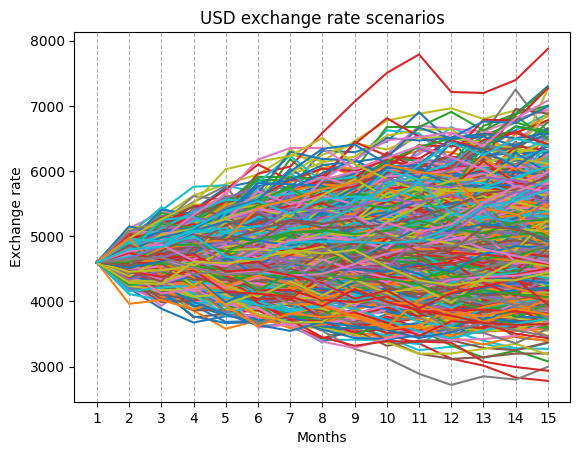

In [209]:
# Plot the USD scenarios
scenarios_df_USD.plot(legend=False)

plt.xlabel("Months")
plt.ylabel("Exchange rate")
plt.title("USD exchange rate scenarios")
# Change x ticks to show each of the 15 months and set line style to dashed
plt.xticks(np.arange(0, len(scenarios_df_USD), 1), np.arange(1, 16))
plt.grid(axis='x', which='major', linestyle='--')

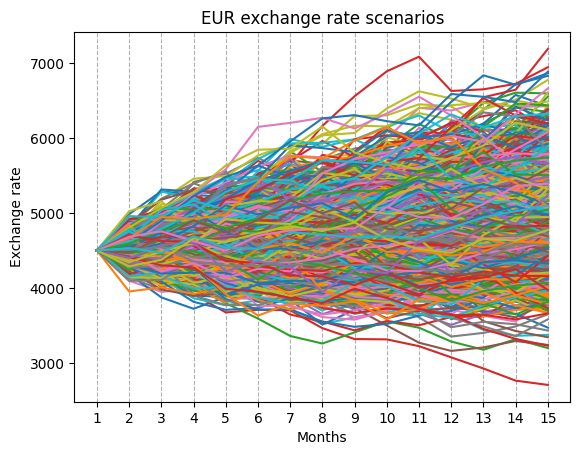

In [210]:
# Plot the EUR scenarios
scenarios_df_EUR.plot(legend=False)

plt.xlabel("Months")
plt.ylabel("Exchange rate")
plt.title("EUR exchange rate scenarios")
# Change x ticks to show each of the 15 months and set line style to dashed
plt.xticks(np.arange(0, len(scenarios_df_EUR), 1), np.arange(1, 16))
plt.grid(axis='x', which='major', linestyle='--')

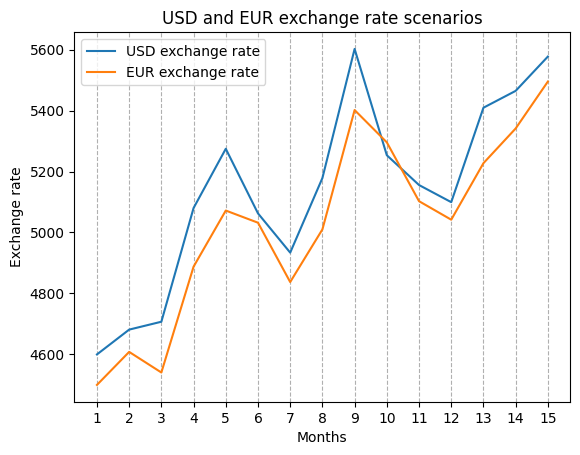

In [211]:
# Plot the 500th USD scenario and the 500th EUR scenario to show correlation
plt.plot(scenarios_df_USD["USD exchange rate 500"], label="USD exchange rate")
plt.plot(scenarios_df_EUR["EUR exchange rate 500"], label="EUR exchange rate")

plt.xlabel("Months")
plt.ylabel("Exchange rate")
plt.title("USD and EUR exchange rate scenarios")
# Change x ticks to show each of the 15 months and set line style to dashed
plt.xticks(np.arange(0, len(scenarios_df_EUR), 1), np.arange(1, 16))
plt.grid(axis='x', which='major', linestyle='--')
# show legend
plt.legend()

# Risk
We will evaluate the simulations using the CrowdLoan projections to find expected net flows 

In [212]:
# Evaluate the model for each of the 1000 scenarios
# Create a dataframe to store the results
results_df = pd.DataFrame(columns=["Total flow"])

# Evaluate the model for each of the 1000 scenarios
for i in range(1000):
    # Get the USD and EUR exchange rates for the scenario
    USD_exchange_rates = scenarios_df_USD["USD exchange rate " + str(i)]
    EUR_exchange_rates = scenarios_df_EUR["EUR exchange rate " + str(i)]
    # Evaluate the model for the scenario
    total_flow = get_total_flow(initial_fixed_expenses, initial_credits, initial_loans, initial_balance, scenarios_df.loc[i * 15 : i * 15 + 14].reset_index(), bank_account_duration=1)
    # Add the results to the dataframes
    results_df.loc[i] = [total_flow + initial_balance]

# Export the results to csv files
results_df.to_csv("results.csv")

results_df

,Total flow
0,"$-6,235,848,865.00"
1,"$-8,894,462,276.39"
2,"$-7,949,242,925.42"
3,"$-5,562,864,085.52"
4,"$-9,972,662,137.40"
...,...
995,"$-8,970,634,043.38"
996,"$-9,288,007,089.31"
997,"$-6,842,725,736.80"
998,"$-6,194,303,982.19"


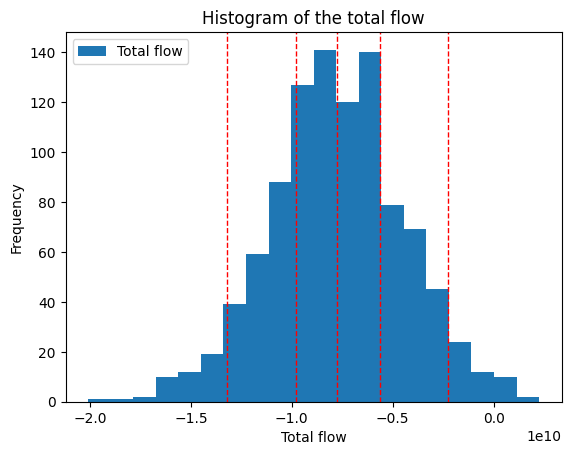

In [213]:
# Graph a histogram of the results
results_df.plot.hist(bins=20)

plt.xlabel("Total flow")
plt.ylabel("Frequency")
plt.title("Histogram of the total flow")

# Show lines for the 5th, 25th, 50th, 75th and 95th percentiles
plt.axvline(results_df.quantile(0.05)[0], color='r', linestyle='dashed', linewidth=1)
plt.axvline(results_df.quantile(0.25)[0], color='r', linestyle='dashed', linewidth=1)
plt.axvline(results_df.quantile(0.5)[0], color='r', linestyle='dashed', linewidth=1)
plt.axvline(results_df.quantile(0.75)[0], color='r', linestyle='dashed', linewidth=1)
plt.axvline(results_df.quantile(0.95)[0], color='r', linestyle='dashed', linewidth=1)
plt.show()

In [218]:
# Display descriptive statistics of the results, including the probability of a negative total flow
description = results_df.describe()

# Calculate the probability of a negative total flow
negative_total_flow_probability = len(results_df[results_df["Total flow"] < 0]) / len(results_df)
description.loc["negative total flow probability"] = negative_total_flow_probability	

# Save the description to a csv file
description.to_csv("description.csv")

# Format the results to three decimal places
pd.options.display.float_format = '{:,.3f}'.format
description

,Total flow
count,"1,000.000"
mean,"-9,224,583,566.443"
std,"3,405,979,361.153"
min,"-21,401,926,079.189"
25%,"-11,448,152,583.568"
50%,"-9,156,064,741.703"
75%,"-7,005,598,581.289"
max,"1,999,083,482.953"
negative total flow probability,0.998


# Sensitivity
We will estimate the sensitivity of the total cash flow in COP to parallel unitary movements of each exchange rate.

In [215]:
# We will estimate the sensitivity of the total cash flow in COP to parallel unitary movements of each exchange rate, first we will do it with USD.
# USD simulations go up by 1 COP
# Create a dataframe to store the results
results_df = pd.DataFrame(columns=["Total flow"])
# Store the previous mean
unmodified_mean = description.loc["mean"][0]

# Evaluate the model for each of the 1000 scenarios
for i in range(1000):
    # Read the scenarios from the csv files
    sensitivity_scenarios_df = scenarios_df.copy()
    # Evaluate the model for the scenario
    # Add 1 COP to the USD exchange rates
    sensitivity_scenarios_df["USD exchange rate"] += 1
    total_flow = get_total_flow(initial_fixed_expenses, initial_credits, initial_loans, initial_balance, sensitivity_scenarios_df.loc[i * 15 : i * 15 + 14].reset_index(), bank_account_duration=1)
    # Add the results to the dataframes
    results_df.loc[i] = [total_flow + initial_balance]

# Find the new mean
modified_mean = results_df.describe().loc["mean"][0]
# Calculate the sensitivity
USD_sensitivity = modified_mean - unmodified_mean

# Display the results
print("USD sensitivity: {:.2f}".format(USD_sensitivity))

USD sensitivity: -4447299.17


In [216]:
# Now we will do it with EUR.
# EUR simulations go up by 1 COP
# Create a dataframe to store the results
results_df = pd.DataFrame(columns=["Total flow"])
# Store the previous mean
unmodified_mean = description.loc["mean"][0]

# Evaluate the model for each of the 1000 scenarios
for i in range(1000):
    # Read the scenarios from the csv files
    sensit_scenarios_df = scenarios_df.copy()
    # Evaluate the model for the scenario
    # Add 1 COP to the EUR exchange rates
    scenarios_df["EUR exchange rate"] += 1
    total_flow = get_total_flow(initial_fixed_expenses, initial_credits, initial_loans, initial_balance, scenarios_df.loc[i * 15 : i * 15 + 14].reset_index(), bank_account_duration=1)
    # Add the results to the dataframes
    results_df.loc[i] = [total_flow + initial_balance]

# Find the new mean
modified_mean = results_df.describe().loc["mean"][0]
# Calculate the sensitivity
EUR_sensitivity = modified_mean - unmodified_mean

# Save both sensitivities to a csv file
pd.DataFrame({"USD sensitivity": [USD_sensitivity], "EUR sensitivity": [EUR_sensitivity]}).to_csv("sensitivities.csv")

# Display the results
print("EUR sensitivity: {:.2f}".format(EUR_sensitivity))


EUR sensitivity: -1483634901.57
